**PyMuPDF** is a library designed to help developers manipulate PDFs and other document types. It is power-packed with features to support a broad array of tasks like ``extracting text``, ``images``, and `metadata`, `modifying documents`, and even `rendering pages as images`.

In [1]:
#For colab use the following installation command.
!pip install pymupdf
#For local execution execute the above command in terminal without '!' symbol in your environment.

In [26]:
import fitz
import io

pdf_file_path = "./Week_2/Day_4/Files/llama_paper.pdf"

## Metadata Manipulation

Metadata in a document provides crucial details about the document’s properties, such as the title, author, date of creation, modification date, and more. PyMuPDF makes it very easy to access and manipulate metadata.

### Accessing Metadata



In [2]:
doc = fitz.open(pdf_file_path)
metadata = doc.metadata

FileNotFoundError: no such file: './Week_2/Day_4/Files/llama_paper.pdf'

In [28]:
for key, value in metadata.items():
    print(f"{key}: {value}")

format: PDF 1.5
title: 
author: 
subject: 
keywords: 
creator: LaTeX with hyperref
producer: pdfTeX-1.40.25
creationDate: D:20230720003036Z
modDate: D:20230720003036Z
trapped: 
encryption: None


### Updating Metadata

In [29]:
new_metadata = {"title": "Llama 2: Open Foundation and Fine-Tuned Chat Models", "author": "Genai meta"}
doc.set_metadata(new_metadata)

#  existing metadata keys omitted in the new dictionary will remain unchanged.

In [30]:
metadata = doc.metadata
for key, value in metadata.items():
    print(f"{key}: {value}")

format: PDF 1.5
title: Llama 2: Open Foundation and Fine-Tuned Chat Models
author: Genai meta
subject: 
keywords: 
creator: LaTeX with hyperref
producer: pdfTeX-1.40.25
creationDate: D:20230720003036Z
modDate: D:20230720003036Z
trapped: 
encryption: None


# Table of Contents Manipulation

## Extracting the ToC


In [31]:
toc = doc.get_toc()

In [32]:
toc

[[1, 'Introduction', 3],
 [1, 'Pretraining', 5],
 [2, 'Pretraining Data', 5],
 [2, 'Training Details', 5],
 [2, 'Llama 2 Pretrained Model Evaluation', 7],
 [1, 'Fine-tuning', 8],
 [2, 'Supervised Fine-Tuning (SFT)', 9],
 [2, 'Reinforcement Learning with Human Feedback (RLHF)', 9],
 [2, 'System Message for Multi-Turn Consistency', 16],
 [2, 'RLHF Results', 17],
 [1, 'Safety', 20],
 [2, 'Safety in Pretraining', 20],
 [2, 'Safety Fine-Tuning', 23],
 [2, 'Red Teaming', 28],
 [2, 'Safety Evaluation of Llama 2-Chat', 29],
 [1, 'Discussion', 32],
 [2, 'Learnings and Observations', 32],
 [2, 'Limitations and Ethical Considerations', 34],
 [2, 'Responsible Release Strategy', 35],
 [1, 'Related Work', 35],
 [1, 'Conclusion', 36],
 [1, 'Appendix', 46],
 [2, 'Contributions', 46],
 [2, 'Additional Details for Pretraining', 47],
 [2, 'Additional Details for Fine-tuning', 51],
 [2, 'Additional Details for Safety', 58],
 [2, 'Data Annotation', 72],
 [2, 'Dataset Contamination', 75],
 [2, 'Model Card',

This will return a Python list of lists, where each sub-list represents a ToC entry in the form `[level, title, page, …]`.

* The **“level”** values in this list are integers indicating the `indentation level` (and thus the hierarchy) of items when you are looking at a book’s table of contents. The level value of the very first item in the ToC is always 1.

* The **“title”** is a string indicating the type of content to expect at the indicated location or page.
* The **“page”** is an integer page number.

## Updating the ToC


In [33]:
new_toc = [[1, "GenAI", 1], [2, "LLM", 2]]
doc.set_toc(new_toc)

2

 Any previously existing ToC in the PDF will be replaced by this.

In [34]:
toc = doc.get_toc()
toc

[[1, 'GenAI', 1], [2, 'LLM', 2]]

# Extracting pages

In [36]:
def extract_pages(pdf_file_path, start_page, end_page):
    """
    Extracts a range of pages from a specified PDF and returns them as a BytesIO object.

    Args:
    pdf_file_path (str): The path to the PDF file.
    start_page (int): The first page to extract (1-based index).
    end_page (int): The last page to extract (1-based index).

    Returns:
    BytesIO: The extracted pages as a BytesIO object.
    """
    document = fitz.open(pdf_file_path)
    new_doc = fitz.open()

    for page_num in range(start_page - 1, end_page):
        new_doc.insert_pdf(document, from_page=page_num, to_page=page_num)

    output_stream = io.BytesIO()
    new_doc.save(output_stream)
    new_doc.close()
    output_stream.seek(0)
    return output_stream

In [37]:
# extract pages
extracted_pages = extract_pages(pdf_file_path, 1, 2)

In [39]:
# save the extracted pages as pdf
output_pdf_file = "./Week_2/Day_4/Files/extracted_pages_1_2.pdf"
with open(output_pdf_file, "wb") as output_file:
        output_file.write(extracted_pages.read())

# Convert pages to image

In [40]:
def convert_pdf_page_to_image(pdf_file_path, output_image_file_name, page_number, zoom=2):
    """
    Saves a specific page of a PDF to an image.

    Args:
    pdf_file_path (str): Path to the PDF file.
    page_number (int): Page number to convert to image (0-based index).
    zoom (float): Zoom factor for the image. Higher values mean better quality.
    output_image_file_name (str): Name of the output image file.
    """
    document = fitz.open(pdf_file_path)
    page = document.load_page(page_number)

    mat = fitz.Matrix(zoom, zoom)
    pix = page.get_pixmap(matrix=mat)

    pix.save(output_image_file_name)

    document.close()

In [44]:
# Example usage
output_image_file_path = "./Week_2/Day_4/Files/output_image.png"
page_number = 2  # First page
zoom = 2  # Zoom factor
convert_pdf_page_to_image(pdf_file_path, output_image_file_path, page_number, zoom)

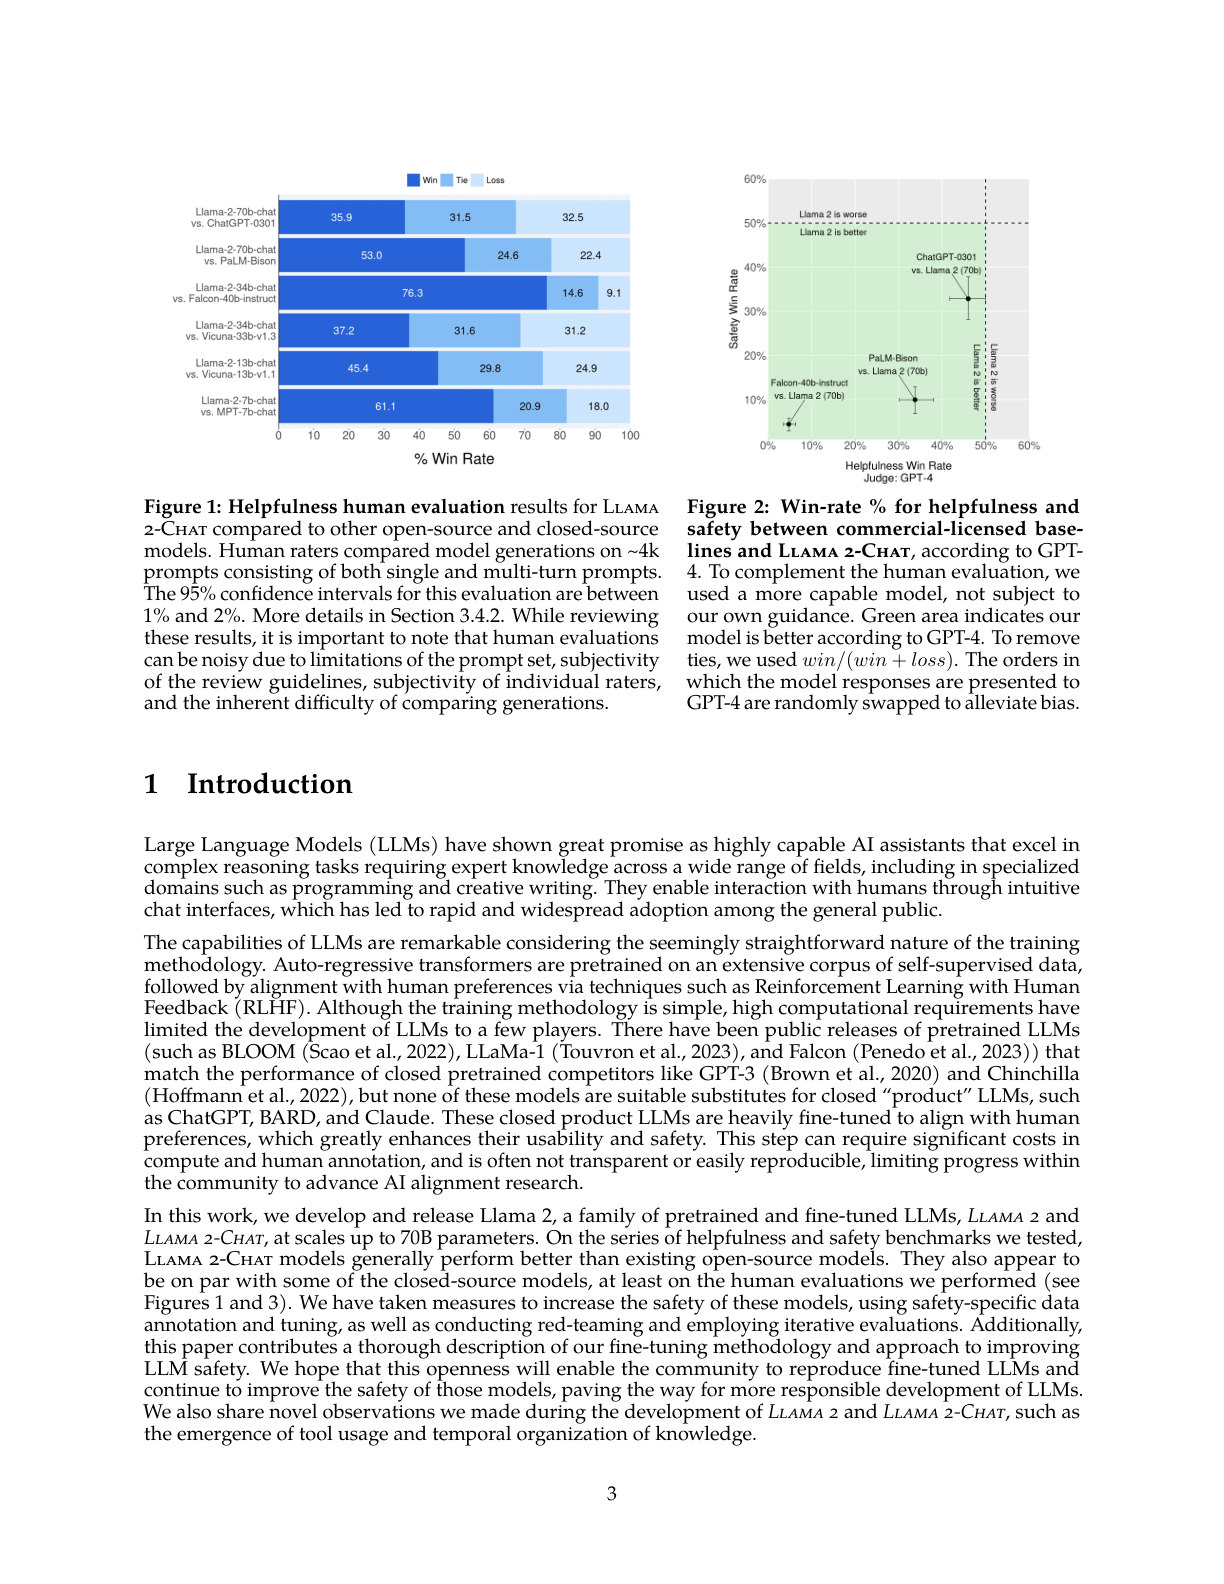

In [45]:
from IPython.display import Image, display

# Display the saved image
display(Image(filename=output_image_file_path))